In [40]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_csv('cluster2.csv')
df

,X,Y
0,1.070487,1.328147
1,1.072777,1.191249
2,0.328029,1.261713
3,0.600926,1.254465
4,0.759281,1.284541
5,0.398466,1.140908
6,0.232625,1.361439
7,0.868427,1.226005
8,0.397961,1.241644
9,0.973375,1.309528


In [5]:
X = df.values
X

array([[1.07048688, 1.3281469 ],
       [1.07277723, 1.19124898],
       [0.3280287 , 1.26171275],
       ...,
       [0.79848816, 0.44262997],
       [0.64616521, 0.41227532],
       [1.24581503, 0.7992118 ]])

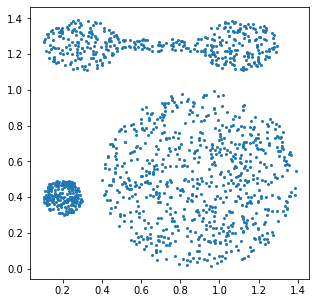

In [9]:
plt.figure(figsize=(5, 5))

plt.scatter(X[:, 0], X[:, 1], s=4)

plt.show()

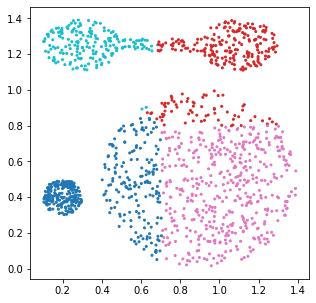

In [27]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans = KMeans(n_clusters=4)
y_pred = kmeans.fit_predict(X)

cmap = 'tab10'

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], s=4, c=y_pred, cmap=cmap)
plt.show()

In [28]:
y_pred = k_means.fit_predict(X)
print(y_pred[:10])

[1 1 0 0 1 0 0 1 0 1]


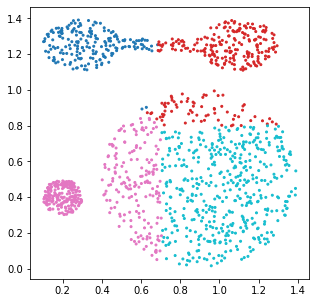

In [29]:
plt.figure(figsize = (5, 5))
plt.scatter(X[:, 0], X[:, 1], c = y_pred, s = 4, cmap = cmap)
plt.show()

In [32]:
a = ('A', 'B', 'C')
for i in enumerate(a):
    print(i)

(0, 'A')
(1, 'B')
(2, 'C')


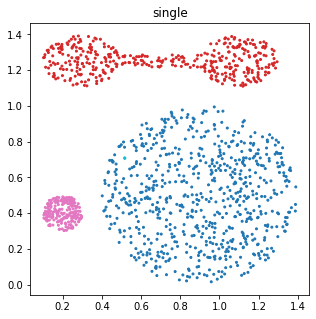

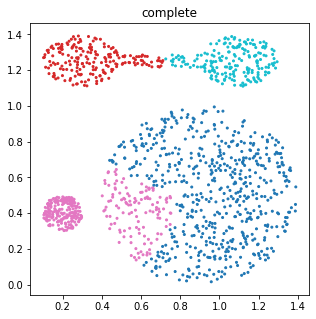

In [34]:
for i, linkage in enumerate(('single', 'complete')):
    clustering = AgglomerativeClustering(
        linkage=linkage, n_clusters=4)
    y_pred = clustering.fit_predict(X)
    plt.figure(i +1, figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=4, cmap=cmap)
    plt.title(linkage)

plt.show()

In [ ]:
for i, linkage in enumerate(('single', 'complete')):
    clustering = AgglomerativeClustering(
        linkage=linkage, n_clusters=4)
    y_pred = clustering.fit_predict(X)
    plt.figure(i +1, figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=4, cmap=cmap)
    plt.title(linkage)

plt.show()

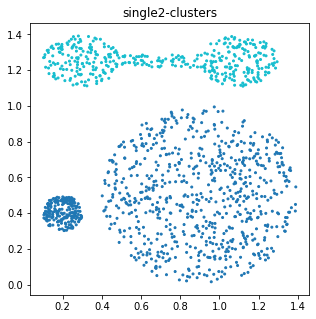

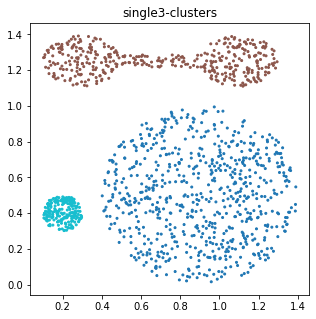

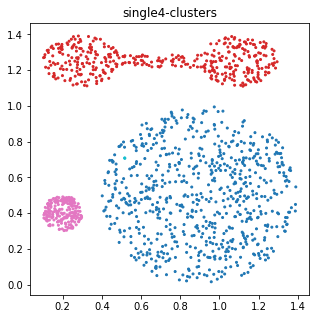

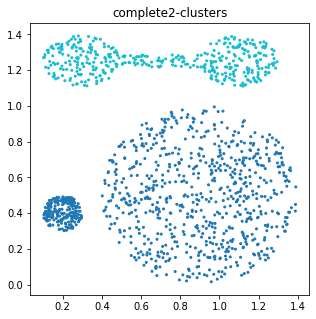

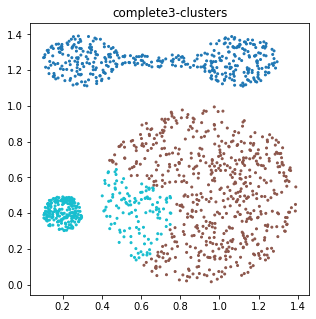

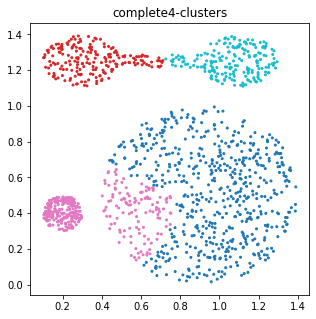

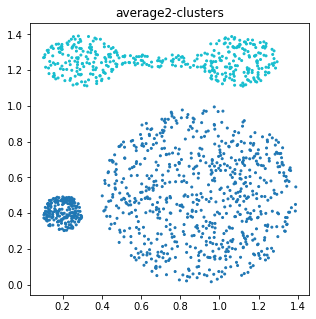

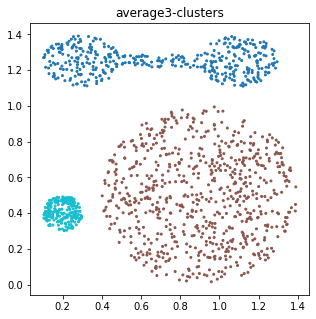

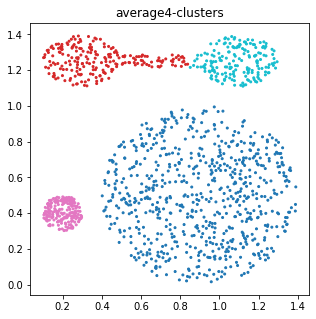

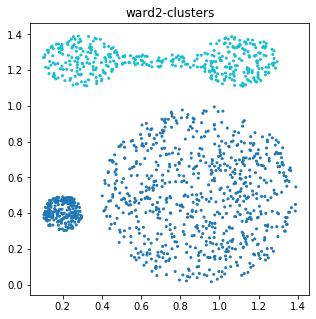

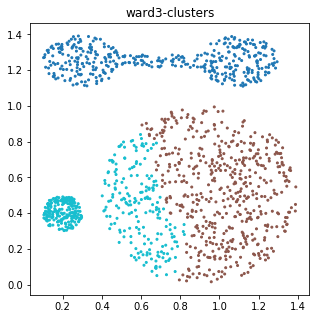

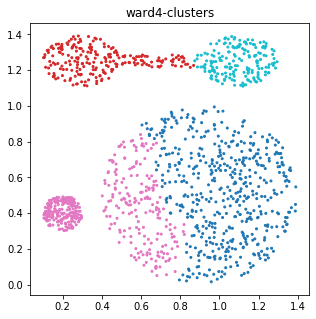

In [35]:
for i, linkage in enumerate(('single', 'complete', 'average', 'ward')):
    for clusters_num in range(2, 5):
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=clusters_num)
        y_pred = clustering.fit_predict(X)
        plt.figure(figsize=(5, 5))
        plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=4, cmap=cmap)
        plt.title(linkage+f'{clusters_num}-clusters' )

plt.show()

In [38]:
dbscan = DBSCAN(eps=0.05, min_samples=20)
y_pred = dbscan.fit_predict(X)
print(y_pred[:10])

[ 0  4 -1 -1 -1 -1 -1 -1 -1 -1]


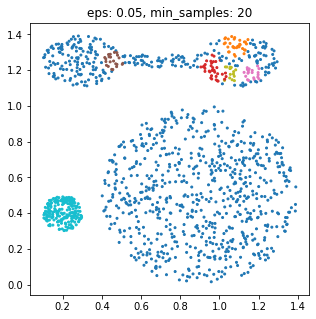

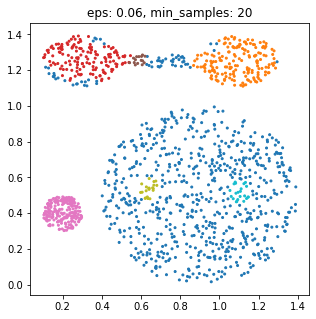

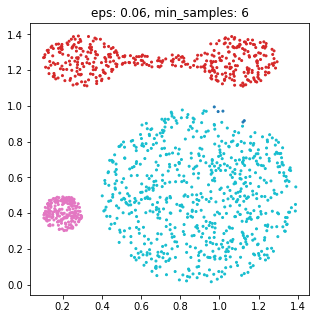

In [39]:
for i, (eps, min_samples) in enumerate(((0.05, 20), (0.06, 20), (0.06, 6))):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)
    plt.figure(i + 1, figsize= (5, 5))
    plt.scatter(X[:, 0], X[:, 1], cmap=cmap, s=4, c=y_pred)
    plt.title("eps: {}, min_samples: {}".format(eps, min_samples))
plt.show()

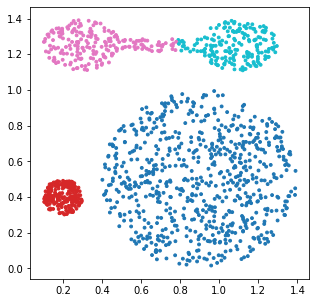

In [41]:
em = GaussianMixture (n_components=4, max_iter=20,
                     random_state=0)
y_pred = em.fit_predict(X)
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1],
           cmap=cmap, s=8, c=y_pred)
plt.show()